In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
sartajbhuvaji_brain_tumor_classification_mri_path = kagglehub.dataset_download('sartajbhuvaji/brain-tumor-classification-mri')

print('Data source import complete.')


Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sartajbhuvaji/brain-tumor-classification-mri")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/brain-tumor-classification-mri


In [5]:
import os
print(os.listdir(path))

['Training', 'Testing']


In [6]:
Training_dir_path = "/kaggle/input/brain-tumor-classification-mri/Training"
Testing_dir_path = "/kaggle/input/brain-tumor-classification-mri/Testing"

In [7]:
print(os.listdir(Training_dir_path))

['no_tumor', 'pituitary_tumor', 'meningioma_tumor', 'glioma_tumor']


In [ ]:
print(os.listdir(Testing_dir_path))

['no_tumor', 'pituitary_tumor', 'meningioma_tumor', 'glioma_tumor']


In [8]:
no_of_glioma_tumor = len(Training_dir_path+"/glioma_tumor")+len(Testing_dir_path+"/glioma_tumor")
no_of_meningioma_tumor = len(Training_dir_path+"/meningioma_tumor")+len(Testing_dir_path+"/meningioma_tumor")
no_of_pituitary_tumor = len(Training_dir_path+"/pituitary_tumor")+len(Testing_dir_path+"/pituitary_tumor")
no_of_no_tumor = len(Training_dir_path+"/no_tumor")+len(Testing_dir_path+"/no_tumor")

In [9]:
class_names = ['glioma_tumor','meningioma_tumor','pituitary_tumor','no_tumor']

In [ ]:
Total_images_of_each_class=[no_of_glioma_tumor,no_of_meningioma_tumor,no_of_pituitary_tumor,no_of_no_tumor]
for i in Total_images_of_each_class:
    print(i)

131
139
137
123


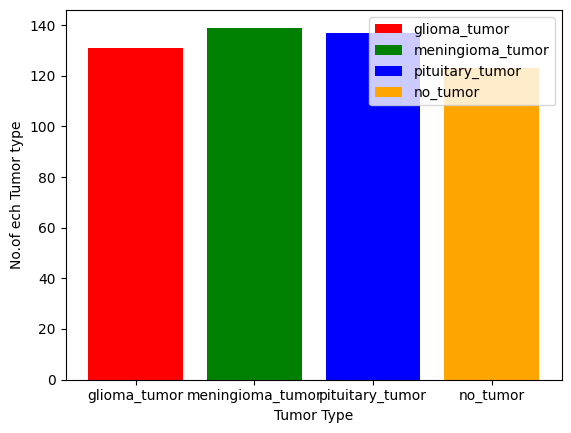

In [ ]:
import matplotlib.pyplot as plt
plt.bar(class_names,Total_images_of_each_class,color=['red','green','blue','orange'],label=class_names)
plt.xlabel('Tumor Type')
plt.ylabel('No.of ech Tumor type')
plt.legend()
plt.show()

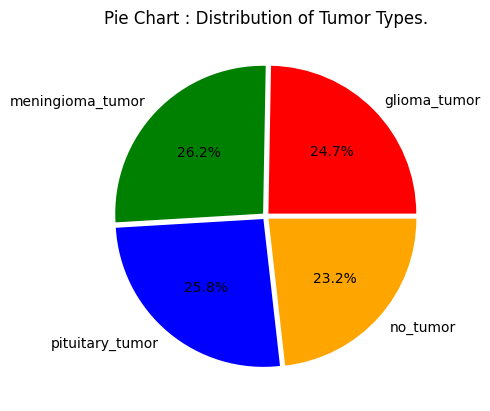

In [ ]:
plt.pie(Total_images_of_each_class,labels=class_names,colors=['red','green','blue','orange'],autopct='%.1f%%',explode=(0.025,0.025,0.025,0.025))
plt.title('Pie Chart : Distribution of Tumor Types.')
plt.show()

In [10]:
import numpy as np
import os
import keras
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
from PIL import ImageFilter, ImageOps, Image
import cv2
from keras import layers
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_recall_curve, precision_score, recall_score, f1_score, confusion_matrix

In [11]:
X_train = []
y_train = []

for i in class_names:
    file_path = os.path.join(Training_dir_path,i)
    for j in os.listdir(file_path):
        img = cv2.imread(os.path.join(file_path,j))
        img = cv2.resize(img,(112,112))
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        filtered_img= cv2.GaussianBlur(gray, (5,5), cv2.BORDER_DEFAULT)
        equalized_img = cv2.equalizeHist(filtered_img)
        X_train.append(equalized_img)
        y_train.append(i)


for i in class_names:
    file_path = os.path.join(Testing_dir_path,i)
    for j in os.listdir(file_path):
        img = cv2.imread(os.path.join(file_path,j))
        img = cv2.resize(img,(112,112))
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        filtered_img= cv2.GaussianBlur(gray, (5,5), cv2.BORDER_DEFAULT)
        equalized_img = cv2.equalizeHist(filtered_img)
        X_train.append(equalized_img)
        y_train.append(i)






In [12]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [13]:
y_train[y_train=='glioma_tumor']=0
y_train[y_train=='meningioma_tumor']=1
y_train[y_train=='pituitary_tumor']=2
y_train[y_train=='no_tumor']=3

In [14]:
y_train = to_categorical(y_train,num_classes=4)


In [15]:
print(X_train.shape, y_train.shape)


(3264, 112, 112) (3264, 4)


In [16]:
np.save('X.npy',X_train)
np.save('y.npy',y_train)

In [17]:
X_train = np.load('X.npy')
y_train = np.load('y.npy')

In [18]:
# First split: training + temp (test + val)
X_temp, X_test, y_temp, y_test = train_test_split(X_train, y_train, test_size=0.163, random_state=42)

# Second split: training + validation
X_train_final, X_val, y_train_final, y_val = train_test_split(X_temp, y_temp, test_size=0.194, random_state=42)


In [19]:
import random
random.seed(42)

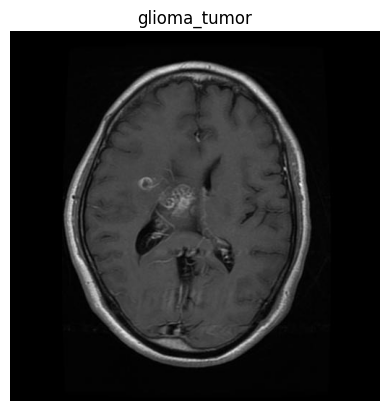

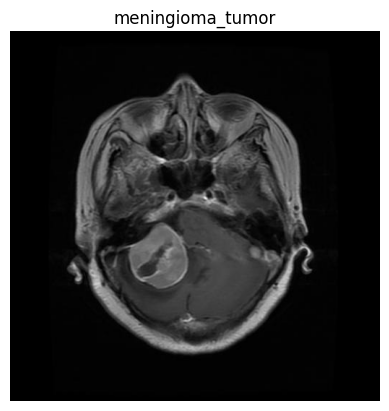

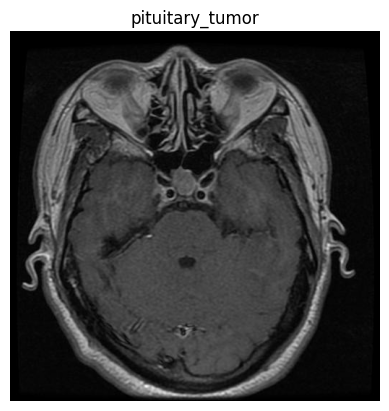

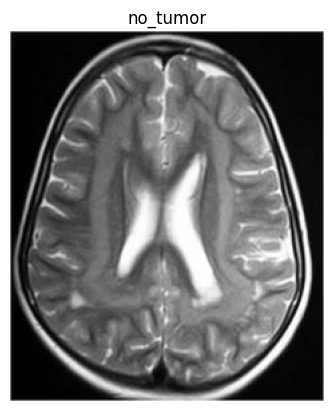

In [20]:
for label in class_names:
    folder_path = os.path.join(path, 'Training', label)
    file_list = os.listdir(folder_path)
    k = random.randint(0, len(file_list) - 1)
    img_path = os.path.join(folder_path, file_list[k])
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img)
    plt.title(label)
    plt.axis('off')
    plt.show()


In [21]:
from keras import layers, Sequential, Input

model = Sequential([
    Input(shape=(112,112,1)),  # Use Input layer instead of passing input_shape
    layers.Conv2D(filters=32, kernel_size=(5,5), strides=(1,1), padding="valid", activation="relu"),
    layers.MaxPooling2D(pool_size=(2,2), strides=(1,1)),
    layers.Dropout(rate=0.25),
    layers.Conv2D(filters=64, kernel_size=(5,5), padding="valid", strides=(1,1), activation="relu"),
    layers.MaxPooling2D(pool_size=(2,2), strides=(1,1)),
    layers.Dropout(rate=0.25),
    layers.Conv2D(filters=128, kernel_size=(5,5), strides=(1,1), activation="relu"),
    layers.Dropout(rate=0.4),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(rate=0.3),
    layers.Dense(4, activation="softmax")
])


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 108, 108, 32)   │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 107, 107, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 107, 107, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 103, 103, 64)   │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 102, 102, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 102, 102, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 98, 98, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 98, 98, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1229312)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │   157,352,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 157,609,604 (601.23 MB)

 Trainable params: 157,609,604 (601.23 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [24]:
model.fit(x= (X_train_final/255), y= y_train_final, epochs=10, batch_size=32)


Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 33s 263ms/step - accuracy: 0.4138 - loss: 2.8368
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 17s 105ms/step - accuracy: 0.6915 - loss: 0.7806
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - accuracy: 0.7666 - loss: 0.6174
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - accuracy: 0.8261 - loss: 0.4641
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - accuracy: 0.8694 - loss: 0.4007
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.8883 - loss: 0.2998
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - accuracy: 0.9374 - loss: 0.1772
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - accuracy: 0.9418 - loss: 0.1686
Epoch 9/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - accuracy: 0.9605 - loss: 0.1020
Epoch 10/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 107ms/step - accuracy: 0.9648 - loss: 0.1139


In [25]:
model.save('cnn_model2.h5')


In [26]:
from keras.models import load_model


In [27]:
model = load_model('cnn_model2.h5')


In [28]:
# Predict on test data
y_pred = model.predict(X_test/255)
np.save('y_pred_cnn.npy', y_pred)
# Evaluate the model
score = model.evaluate(X_test/255, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 241ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.8857 - loss: 0.5810
Test loss: 0.5326064825057983
Test accuracy: 0.8780487775802612


In [31]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

precision, recall, f1score, _ = precision_recall_fscore_support(y_test.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')
Confusion_matrix =confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

print('TEST LOSS: ', round(score[0],4))
print(f'\nTEST ACCURACY : ' ,round(score[1]*100,2),'%')
print('\nPRECISION : ', round(precision,4))
print('\nRECALL : ', round(recall,4))
print('\nF1 SCORE : ', round(f1score,4))
print('\nCONFUSION MATRIX : \n', Confusion_matrix)


TEST LOSS:  0.5326

TEST ACCURACY :  87.8 %

PRECISION :  0.8813

RECALL :  0.878

F1 SCORE :  0.878

CONFUSION MATRIX : 
 [[155  21   4   5]
 [  4 123   6  10]
 [  2   1 128   0]
 [  3   4   5  62]]


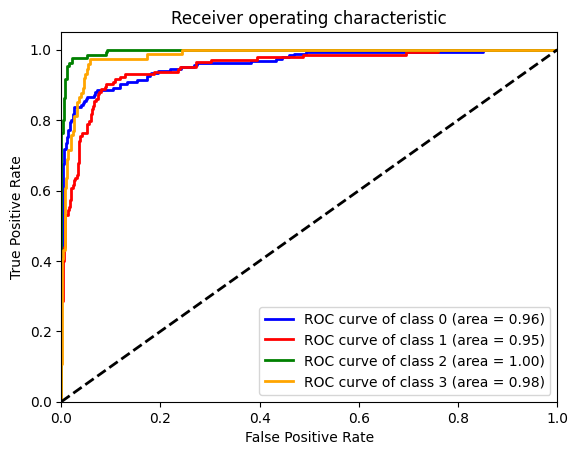

In [33]:
# ROC(Receiver Operating Characteristic) curve for each class
from sklearn.metrics import roc_curve, auc # Import roc_curve and auc

fpr = dict()  ##false positive rate
tpr = dict()  ##true positive rate
roc_auc = dict() ##

num_classes = 4

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure()
lw = 2
colors = ['blue', 'red', 'green', 'orange'] # you can choose your own colors
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
